# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Fall 2019

### Part I: Hybrid Images

In [24]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal

import utils

In [25]:
%matplotlib notebook

In [26]:
im1_file = './index_files/nutmeg.jpg'
im2_file = './index_files/DerekPicture.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

In [17]:
cv2.imshow("z",im1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
ft = np.asarray(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))),dtype='uint8')
cv2.imshow("d",ft)
cv2.waitKey(0)
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>


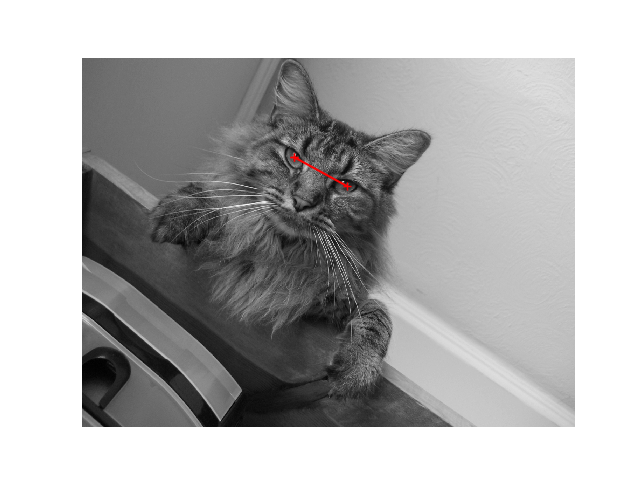

In [27]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


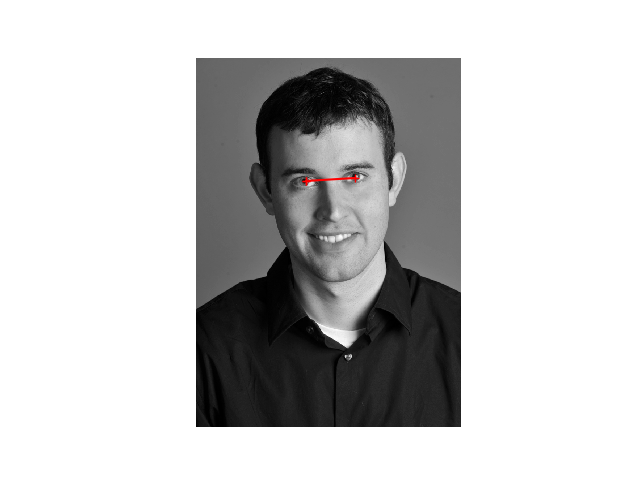

In [28]:
pts_im2 = utils.prompt_eye_selection(im2)

In [29]:
im1, im2= utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [30]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


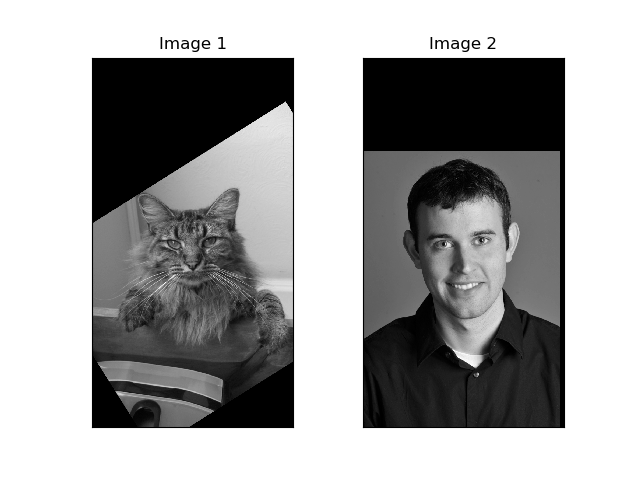

In [31]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [32]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''    
    high_passed = im1 - signal.convolve2d(im1, utils.gaussian_kernel(cutoff_high,3*cutoff_high),boundary='symm', mode='same')
    low_passed = signal.convolve2d(im2, utils.gaussian_kernel(cutoff_low,3*cutoff_low),boundary='symm', mode='same')
    return high_passed+low_passed

In [38]:
arbitrary_value = 20  # you should choose meaningful values; you might want to set to a fraction of image size
cutoff_low = arbitrary_value
cutoff_high = arbitrary_value

im_hybrid = hybridImage(im1, im2, cutoff_low, cutoff_high)

<IPython.core.display.Javascript object>


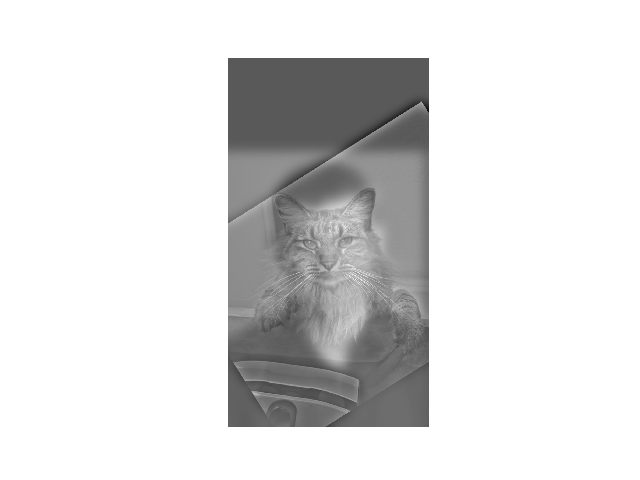

In [39]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

In [ ]:
%matplotlib notebook
# display the 2D Fourier transform
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(cropped_object[0])))))

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

In [ ]:
import cv2

img = cv2.imread('car.jpg', 0)
cv2.imshow("Original image",img)

equ = cv2.equalizeHist(img)

# # CLAHE (Contrast Limited Adaptive Histogram Equalization)
# clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8,8))

# lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
# l, a, b = cv2.split(lab)  # split on 3 different channels

# l2 = clahe.apply(l)  # apply CLAHE to the L-channel

# lab = cv2.merge((l2,a,b))  # merge channels
# img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR

cv2.imshow('Increased contrast', equ)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Color enhancement 

In [ ]:
import cv2
import numpy as np

img = cv2.imread('me.jpg', 1)
cv2.imshow("Original image",img)

hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV).astype(np.float32) # convert from BGR to HSV color space
(h, s, v) = cv2.split(hsv)

hsv = cv2.merge((h,s*1.4,v))  # merge channels
img = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)  # convert from HSV to BGR

cv2.imshow('Increased saturation', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Color shift

In [ ]:
np.real(-np.Inf+1)

In [ ]:
import cv2
import numpy as np

img = cv2.imread('rickandmorty2.jpg', 1)
cv2.imshow("Original image",img)

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB).astype(np.float32)
l, a, b = cv2.split(lab)

lab = cv2.merge((l,a+50,b))  # merge channels
img = cv2.cvtColor(lab.astype(np.uint8), cv2.COLOR_LAB2BGR)  # convert from LAB to BGR

cv2.imshow('More red', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

img = cv2.imread('rickandmorty.jpg', 1)
cv2.imshow("Original image",img)

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB).astype(np.float32)
l, a, b = cv2.split(lab)

lab = cv2.merge((l,a,b-30))  # merge channels
img = cv2.cvtColor(lab.astype(np.uint8), cv2.COLOR_LAB2BGR)  # convert from LAB to BGR

cv2.imshow('less yellow', img)
cv2.waitKey(0)
cv2.destroyAllWindows()